Import necessary libraries

In [1]:
import pandas as pd

Read the January and February datasets

In [2]:
jan_dataset = pd.read_parquet(r'Week_1\fhv_tripdata_2021-01.parquet')
feb_dataset = pd.read_parquet(r'Week_1\fhv_tripdata_2021-02.parquet')

In [3]:
jan_dataset.head()

,dispatching_base_num,pickup_datetime,dropOff_datetime,PUlocationID,DOlocationID,SR_Flag,Affiliated_base_number
0,B00009,2021-01-01 00:27:00,2021-01-01 00:44:00,NaN,NaN,None,B00009
1,B00009,2021-01-01 00:50:00,2021-01-01 01:07:00,NaN,NaN,None,B00009
2,B00013,2021-01-01 00:01:00,2021-01-01 01:51:00,NaN,NaN,None,B00013
3,B00037,2021-01-01 00:13:09,2021-01-01 00:21:26,NaN,72.0,None,B00037
4,B00037,2021-01-01 00:38:31,2021-01-01 00:53:44,NaN,61.0,None,B00037


Question 1 - Number of records in Jan 2021 FHV data 

In [4]:
# Number of records in Jan 2021 FHV data 
jan_dataset.count()

dispatching_base_num      1154112
pickup_datetime           1154112
dropOff_datetime          1154112
PUlocationID               195845
DOlocationID               991892
SR_Flag                         0
Affiliated_base_number    1153227
dtype: int64

#### Data Preparation

Question 2 - Average duration in Jan 2021 FHV

In [5]:
# Average duration in Jan 2021 FHV
jan_trip_duration = jan_dataset['dropOff_datetime'] - jan_dataset['pickup_datetime']
feb_trip_duration = feb_dataset['dropOff_datetime'] - feb_dataset['pickup_datetime']
jan_trip_duration.mean()

Timedelta('0 days 00:19:10.033445627')

In [6]:
jan_dataset['duration'] = (jan_trip_duration.dt.seconds)/60
feb_dataset['duration'] = (feb_trip_duration.dt.seconds)/60

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [8]:
new_jan_dataset = np.logical_and(jan_dataset['duration'] >= 1, jan_dataset['duration'] <= 60)

In [9]:
jan_dataset['duration_validity'] = new_jan_dataset

In [10]:
final_jan_dataset = jan_dataset.mask(jan_dataset['duration_validity']==False)

In [11]:
final_jan_dataset.dropna(subset=['duration_validity'],inplace=True)

In [12]:
final_jan_dataset = final_jan_dataset.drop(['dispatching_base_num', 'pickup_datetime', 'dropOff_datetime',
       'SR_Flag', 'Affiliated_base_number',
       'duration_validity'], axis=1)

In [13]:
final_jan_dataset

,PUlocationID,DOlocationID,duration
0,NaN,NaN,17.000000
1,NaN,NaN,17.000000
3,NaN,72.0,8.283333
4,NaN,61.0,15.216667
5,NaN,71.0,9.050000
...,...,...,...
1154107,7.0,7.0,8.750000
1154108,44.0,91.0,57.600000
1154109,171.0,171.0,16.200000
1154110,15.0,15.0,19.433333


In [14]:
final_jan_dataset = final_jan_dataset.fillna(-1)

In [15]:
final_jan_dataset

,PUlocationID,DOlocationID,duration
0,-1.0,-1.0,17.000000
1,-1.0,-1.0,17.000000
3,-1.0,72.0,8.283333
4,-1.0,61.0,15.216667
5,-1.0,71.0,9.050000
...,...,...,...
1154107,7.0,7.0,8.750000
1154108,44.0,91.0,57.600000
1154109,171.0,171.0,16.200000
1154110,15.0,15.0,19.433333


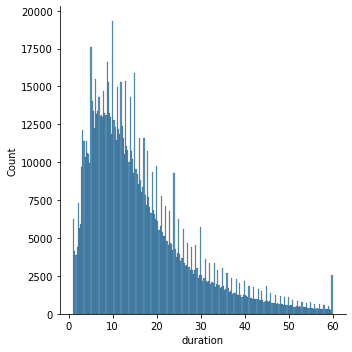

In [16]:
sns.displot(data=final_jan_dataset,x='duration')

Question 3 - Fraction of missing values

In [17]:
# Fraction of missing values for pickup location ID
(np.count_nonzero(final_jan_dataset['PUlocationID'] == -1))/(final_jan_dataset['PUlocationID'].count())

0.835275482428754

Question 4 - Dimensionality after OHE

In [18]:
final_jan_dataset.dtypes

PUlocationID    float64
DOlocationID    float64
duration        float64
dtype: object

In [19]:
categorical = ['PUlocationID','DOlocationID']
numerical = ['duration']

In [20]:
final_jan_dataset[categorical] = final_jan_dataset[categorical].astype(str)

In [32]:
final_jan_dataset_d = pd.get_dummies(final_jan_dataset[categorical])

In [34]:
final_jan_dataset_d['duration'] = final_jan_dataset['duration']

In [35]:
final_jan_dataset_d.count()

PUlocationID_-1.0     1109853
PUlocationID_1.0      1109853
PUlocationID_10.0     1109853
PUlocationID_100.0    1109853
PUlocationID_101.0    1109853
                       ...   
DOlocationID_96.0     1109853
DOlocationID_97.0     1109853
DOlocationID_98.0     1109853
DOlocationID_99.0     1109853
duration              1109853
Length: 526, dtype: int64

Train a Linear Regression Model

In [49]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import math

In [50]:
final_jan_dataset_d.head()

,PUlocationID_-1.0,PUlocationID_1.0,PUlocationID_10.0,PUlocationID_100.0,PUlocationID_101.0,PUlocationID_102.0,PUlocationID_106.0,PUlocationID_107.0,PUlocationID_108.0,PUlocationID_109.0,...,DOlocationID_91.0,DOlocationID_92.0,DOlocationID_93.0,DOlocationID_94.0,DOlocationID_95.0,DOlocationID_96.0,DOlocationID_97.0,DOlocationID_98.0,DOlocationID_99.0,duration
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,17.000000
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,17.000000
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,8.283333
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,15.216667
5,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9.050000


In [51]:
X = final_jan_dataset_d.drop('duration',axis=1)
y = final_jan_dataset_d['duration']

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X,y)

In [53]:
lr = LinearRegression()

In [54]:
lr.fit(X_train, y_train)

LinearRegression()

In [55]:
y_pred = lr.predict(X_test)

In [58]:
math.sqrt(mean_squared_error(y_test,y_pred))

10.561499078677707